In [2]:

pip install keras-preprocessing


     -------------------------------------- 42.6/42.6 KB 521.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rishi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [14]:
TRAIN_DIR = 'C:\\Users\\rishi\\OneDrive\\Documents\\facial emotion\\images\\images\\train'

TEST_DIR = r'C:\Users\rishi\OneDrive\Documents\facial emotion\images\images\test'



In [10]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [11]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
print(train)

                                                   image     label
0      C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
1      C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
2      C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
3      C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
4      C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
...                                                  ...       ...
28704  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise
28705  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise
28706  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise
28707  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise
28708  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise

[28709 rows x 2 columns]


In [15]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [16]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
1     C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
2     C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
3     C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
4     C:\Users\rishi\OneDrive\Documents\facial emoti...     angry
...                                                 ...       ...
7173  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise
7174  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise
7175  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise
7176  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise
7177  C:\Users\rishi\OneDrive\Documents\facial emoti...  surprise

[7178 rows x 2 columns]
0       C:\Users\rishi\OneDrive\Documents\facial emoti...
1       C:\Users\rishi\OneDrive\Documents\facial emoti...
2       C:\Users\rishi\OneDrive\Documents\facial emoti...
3       C

In [17]:
from tqdm.notebook import tqdm

In [18]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [19]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [20]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [21]:
x_train = train_features/255.0
x_test = test_features/255.0

In [22]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [25]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [26]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [29]:
from keras import Input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Input(shape=(48, 48, 1)),  # Replace input_shape with Input layer

    # Convolutional layers
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),

    # Fully connected layers
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),

    # Output layer
    Dense(7, activation='softmax')
])


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 870ms/step - accuracy: 0.2361 - loss: 1.8396 - val_accuracy: 0.2471 - val_loss: 1.8167
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 217s 963ms/step - accuracy: 0.2507 - loss: 1.8098 - val_accuracy: 0.2523 - val_loss: 1.7896
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 194s 863ms/step - accuracy: 0.2529 - loss: 1.7832 - val_accuracy: 0.3029 - val_loss: 1.7221
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 185s 824ms/step - accuracy: 0.3087 - loss: 1.7021 - val_accuracy: 0.3718 - val_loss: 1.5847
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 204s 908ms/step - accuracy: 0.3709 - loss: 1.5894 - val_accuracy: 0.4515 - val_loss: 1.4291
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 203s 901ms/step - accuracy: 0.4111 - loss: 1.5053 - val_accuracy: 0.4634 - val_loss: 1.3773
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 200s 888ms/step - accuracy: 0.4396 - loss: 1.4520 - val_accuracy: 0.4851 - val_loss: 1.3342
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 179s 797ms/step - accuracy: 

In [34]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save using the native Keras format
model.save("emotiondetector.keras")


In [35]:
from keras.models import model_from_json

In [40]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [41]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [44]:
image = "C:\\Users\\rishi\\OneDrive\\Documents\\facial emotion\\images\\images\\train\\angry\\Training_143373.jpg"
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
model prediction is  angry


In [45]:
image = "C:\\Users\\rishi\\OneDrive\\Documents\\facial emotion\\images\\images\\test\\happy\\PrivateTest_647018.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
model prediction is  happy


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  angry


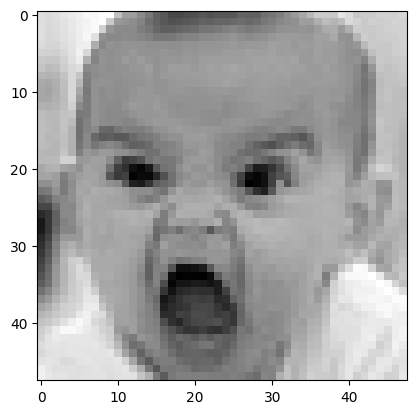

In [47]:
image = "C:\\Users\\rishi\\OneDrive\\Documents\\facial emotion\\images\\images\\train\\angry\\Training_143373.jpg"
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')